Enter mean value (mu): 10
Enter MA coefficient (phi): 0.5

--- Funnel Cake Sales Table (MA(1)) ---
    Month   Error_t  Error_t-1  Sales (Xt)
0       1  1.091283   0.091205   11.136885
1       2 -1.946970   1.091283    8.598671
2       3 -1.386350  -1.946970    7.640165
3       4 -2.296492  -1.386350    7.010334
4       5  2.409834  -2.296492   11.261589
5       6  1.727836   2.409834   12.932753
6       7  2.204556   1.727836   13.068474
7       8  0.794828   2.204556   11.897106
8       9  0.976421   0.794828   11.373835
9      10 -1.183427   0.976421    9.304783
10     11  1.916364  -1.183427   11.324650
11     12 -1.123327   1.916364    9.834855


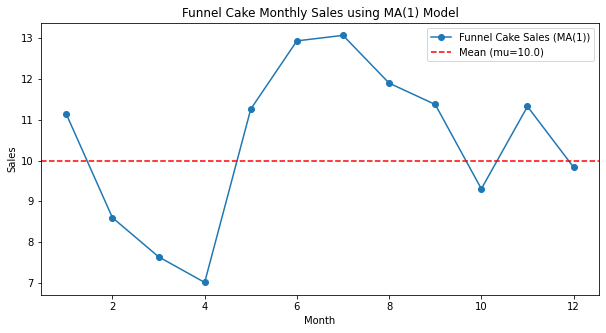

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mu = float(input("Enter mean value (mu): "))
phi = float(input("Enter MA coefficient (phi): "))
n_periods = 12  # 1 year of monthly sales

np.random.seed(8)
errors = np.random.normal(0, 1, n_periods+1)  

# --- 3. Implement MA(1) Model ---
funnel_cakes = []
for t in range(1, n_periods+1):
    xt = mu + phi * errors[t-1] + errors[t]   # MA(1) formula
    funnel_cakes.append(xt)

# --- 4. Table ---
months = np.arange(1, n_periods+1)
df = pd.DataFrame({
    "Month": months,
    "Error_t": errors[1:n_periods+1],
    "Error_t-1": errors[0:n_periods],
    "Sales (Xt)": funnel_cakes
})

print("\n--- Funnel Cake Sales Table (MA(1)) ---")
print(df)

# --- 5. Visualization ---
plt.figure(figsize=(10,5))
plt.plot(months, funnel_cakes, marker='o', label="Funnel Cake Sales (MA(1))")
plt.axhline(mu, color='red', linestyle='--', label=f"Mean (mu={mu})")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Funnel Cake Monthly Sales using MA(1) Model")
plt.legend()
plt.show()


Enter mean value (mu): 10
Enter coefficient phi1: .5
Enter coefficient phi2: .6

--- MA(2) Process Table ---
    Month    ε_t  ε_t-1  ε_t-2  phi1*ε_t-1  phi2*ε_t-2     X_t
0       1 -1.947  1.091  0.091       0.546       0.055   8.653
1       2 -1.386 -1.947  1.091      -0.973       0.655   8.295
2       3 -2.296 -1.386 -1.947      -0.693      -1.168   5.842
3       4  2.410 -2.296 -1.386      -1.148      -0.832  10.430
4       5  1.728  2.410 -2.296       1.205      -1.378  11.555
5       6  2.205  1.728  2.410       0.864       1.446  14.514
6       7  0.795  2.205  1.728       1.102       1.037  12.934
7       8  0.976  0.795  2.205       0.397       1.323  12.697
8       9 -1.183  0.976  0.795       0.488       0.477   9.782
9      10  1.916 -1.183  0.976      -0.592       0.586  11.911
10     11 -1.123  1.916 -1.183       0.958      -0.710   9.125
11     12 -0.664 -1.123  1.916      -0.562       1.150   9.924


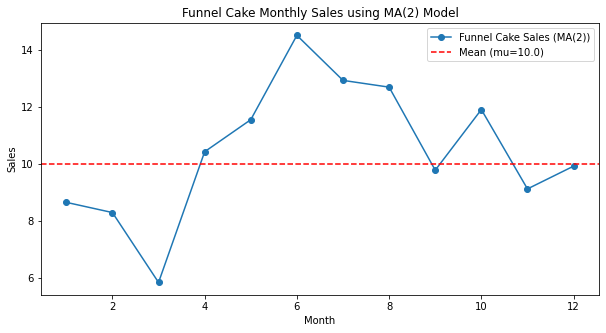

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mu = float(input("Enter mean value (mu): "))
phi1 = float(input("Enter coefficient phi1: "))
phi2 = float(input("Enter coefficient phi2: "))
n_periods = 12  # 1 year of monthly sales

np.random.seed(8)
errors = np.random.normal(0, 1, n_periods+2)  # need extra for lagged terms

# --- 3. Implement MA(2) ---
records = []
funnel_cakes = []

for t in range(2, n_periods+2):
    lag1 = errors[t-1]
    lag2 = errors[t-2]
    current_error = errors[t]
    
    xt = mu + phi1*lag1 + phi2*lag2 + current_error
    funnel_cakes.append(xt)
    
    records.append({
        "Month": t-1,
        "ε_t": round(current_error, 3),
        "ε_t-1": round(lag1, 3),
        "ε_t-2": round(lag2, 3),
        "phi1*ε_t-1": round(phi1*lag1, 3),
        "phi2*ε_t-2": round(phi2*lag2, 3),
        "X_t": round(xt, 3)
    })

# --- 4. Table ---
df = pd.DataFrame(records)
print("\n--- MA(2) Process Table ---")
print(df)

# --- 5. Visualization ---
months = np.arange(1, n_periods+1)
plt.figure(figsize=(10,5))
plt.plot(months, funnel_cakes, marker='o', label="Funnel Cake Sales (MA(2))")
plt.axhline(mu, color='red', linestyle='--', label=f"Mean (mu={mu})")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Funnel Cake Monthly Sales using MA(2) Model")
plt.legend()
plt.show()

